# Imports

In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import matplotlib.pyplot as plt
import time
import numpy as np

2023-10-27 05:55:34.133058: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-27 05:55:34.178071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 05:55:34.806578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Environment

In [2]:
env = gym.make("BipedalWalker-v3", hardcore=False)
env.reset()
env.action_space.sample()

array([-0.6583913 ,  0.48708403, -0.9044893 , -0.15633994], dtype=float32)

# Model

In [3]:
# Parallel environments
vec_env = make_vec_env("BipedalWalker-v3", n_envs=8)

In [5]:
# Instantiate the agent
model = PPO("MlpPolicy", 
            vec_env,
            verbose=0,
            tensorboard_log="PPO_training_bipedal")

In [3]:
model = PPO.load("bipedal_210", env=env)

# Load previous training model if applicable

In [9]:
time_steps = 10000
epochs = 50
# path = "PPO_model"
for i in range(1, epochs):
    model.learn(total_timesteps=time_steps, reset_num_timesteps= False ,tb_log_name="bipedal")
    # if i%25 == 0:
    #     model.save("%s/%s" % (path , i))

In [10]:
model.save("bipedal_210")

In [ ]:
model = PPO.load("bipedal_210", env=env)

In [4]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = vec_env.step(action)
    vec_env.render("human")
    if done:
        break

vec_env.close()

/home/hri/miniconda3/envs/rl_ass/lib/python3.8/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:216: UserWarning: You tried to render a VecEnv with mode='human' but the render mode defined when initializing the environment must be 'human' or 'rgb_array', not 'None'.
  warnings.warn(


In [5]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
cum_reward = 0 
ep_reward = []
i = 0
while (True):
    action, _states = model.predict(obs, deterministic=True)
    #print(action)
    obs, rewards, done, info = vec_env.step(action)
    #vec_env.render("human")
    cum_reward += rewards
    if done:
      obs = vec_env.reset()
      i += 1
      ep_reward.append(cum_reward)
      cum_reward = 0
      if (i > 100):
        break

vec_env.close()

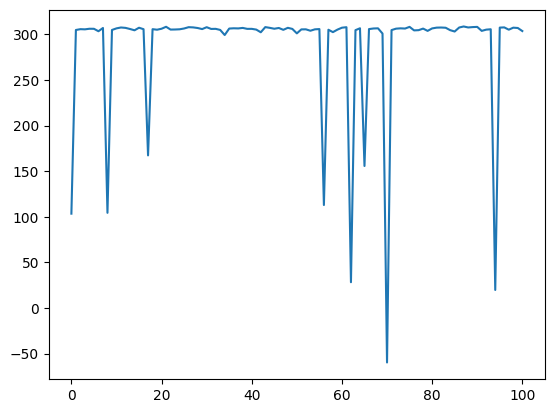

In [12]:
plt.plot(ep_reward)